In [ ]:
import pandas as pd
import numpy as np
import csv 
import string
import nltk 
import re 
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import sys
import warnings
from os import path
import ast
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_score
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
#from sklearn.model_selection import LeaveOneOut
#from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.linear_model import RidgeClassifierCV

# conf limites values
# min <= max
# ex: (1,1)
# (1,4)
configurationTFIDF=(1,4)


# num of features commom values:
# 25, 50, 100, 500, 1000, 5000
num_feature=25

# size of test set
# commom values : 0.20, 0.30, 0.40.
size_test=0.20

#Stop Word
stop_word = "Yes"

#types permitted:
#RandomForest
#RidgeClassifierCV
#GaussianNB
#LinearSVC
#DecisionTree
#LogisticRegression
#MLPClassifier
#BRkNNaClassifier
#MLkNN
test_type = "RandomForest"
#https://xang1234.github.io/multi-label`
# file pattern + str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+

#defining paths
BodyTitle = './experiment/aprioriBodyTitle.csv'
loggingFile = './experiment//TitleBody3GramTFIDF.txt'
binaryBodyTitle = './experiment/binaryBodyTitle.csv'
pandaImage =  './experiment/panda.jpg'
#multilabel_classes = './experiment/PRClassesNoBlankSpaces.csv'
multilabel_classes = './experiment/PRClasses.csv'
report = './experiment/report.csv'
reportText = './experiment/report.txt'
template = './experiment/dfTeste.csv'

tfIDFoutputFile = './experiment/tfIDFoutputFile'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
classifierFeatureInput='./experiment/train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
termFrequencyTop50 = './experiment/termFrequencyTop50'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
predictions_result = './experiment/predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
probabilities_result = './experiment/probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
modelMatrix = './experiment/modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
metrics_by_class = './experiment/metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  
confusionMatrix = './experiment/CM'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'

 

#https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/02.%20Exploratory%20Data%20Analysis/02.%20Exploratory%20Data%20Analysis.ipynb

In [1]:
def format_Title_Body():

    data = pd.read_csv(BodyTitle,header = None,names=range(490))

    #select only the PR, title and body
    df_title_body = data.loc[:, 0:2]
    df_title_body.columns = ['PR', 'title', 'body']

    #selecting the skills
    df_API = data.loc[:, 3:490]
    df_API.rename(columns=lambda x: x-2, inplace=True)

    #concating collumns title + body
    df_title_body["titleBody"] = df_title_body["title"] + df_title_body["body"]

    #subsetting PR and title+body
    df_title_body = df_title_body.loc[:, ['PR', 'titleBody']]

    df_title_body

In [ ]:
format_Title_Body()

In [2]:
### Comments in each category
def plot_comments():

    data_classes = pd.read_csv(binaryBodyTitle, header = 0)

    data_classes["titleBody"] = data_classes["Title"] + data_classes["Body"]
    data_classes = data_classes.drop('Title', 1)
    data_classes = data_classes.drop('Body', 1)

    columnsTitles = ['pr', 'titleBody','XML',
     'Concurrency',
     'HTTP',
     'Memory',
     'Network',
     'CommandLine',
     'OpenOffice Documents',
     'Utils',
     'Dependency',
     'Throws',
     'Logging',
     'Latex',
     'Data Structure',
     'Test',
     'JDK',
     'Runtime',
     'IO',
     'Annotation ',
     'UI',
     'Security',
     'Database',
     'User Preferences',
     'Data',
     'Monitoring',
     'Text Utility']

    #reordering the dataframe collumns to facilitate the plot
    data_classes = data_classes.reindex(columns=columnsTitles)

    categories = list(data_classes.iloc[:,2:])
    sns.set(font_scale = 1)
    plt.figure(figsize=(15,8))


    ax=sns.barplot(categories, data_classes.iloc[:,2:].sum().values)
    plt.title("Comments in each category", fontsize=15)
    plt.ylabel('Number of comments', fontsize=15)
    plt.xlabel('Comment Type ', fontsize=15)
    plt.xticks(rotation=90)
    #adding the text labels
    rects = ax.patches
    labels = data_classes.iloc[:,2:].sum().values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=15)
    plt.show()

    return data_classes

In [ ]:
data_classes = plot_comments()

In [3]:
### Comments having multiple labels
def plot_multi_labels(data_classes):
    
    rowSums = data_classes.iloc[:,2:].sum(axis=1)
    multiLabel_counts = rowSums.value_counts()
    multiLabel_counts = multiLabel_counts.iloc[1:]
    sns.set(font_scale = 2)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
    plt.title("Comments having multiple labels ")
    plt.ylabel('Number of comments', fontsize=15)
    plt.xlabel('Number of labels', fontsize=15)
    #adding the text labels
    rects = ax.patches
    labels = multiLabel_counts.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.show()

In [ ]:
plot_multi_labels(data_classes)

In [4]:
#We first convert the comments to lower-case 
#then use custom made functions to remove html-tags, punctuation and non-alphabetic characters from the TitleBody.

def clean_data(data_classes):
    if not sys.warnoptions:
        warnings.simplefilter("ignore")

    def cleanHtml(sentence):
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, ' ', str(sentence))
        return cleantext

    def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
        cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
        cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
        cleaned = cleaned.strip()
        cleaned = cleaned.replace("\n"," ")
        return cleaned

    def keepAlpha(sentence):
        alpha_sent = ""
        for word in sentence.split():
            alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
            alpha_sent += alpha_word
            alpha_sent += " "
        alpha_sent = alpha_sent.strip()
        return alpha_sent

    #function pra remover palavras com menos de 3 tokens

    data_classes['titleBody'] = data_classes['titleBody'].str.lower()
    data_classes['titleBody'] = data_classes['titleBody'].apply(cleanHtml)
    data_classes['titleBody'] = data_classes['titleBody'].apply(cleanPunc)
    data_classes['titleBody'] = data_classes['titleBody'].apply(keepAlpha)



In [ ]:
clean_data(data_classes)

In [5]:
#### removing stopwords

def remove_stop_words():
    stop_words = set(stopwords.words('english'))
    stop_words.update(['pr','zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within','jabref','org','github','com','md','https','ad','changelog','','joelparkerhenderson','localizationupd',' localizationupd','localizationupd ','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the','Mr', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'])
    #stop_words.update(['i', 'me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

    re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

    def removeStopWords(sentence):
        global re_stop_words
        return re_stop_words.sub(" ", sentence)

    data_classes['titleBody'] = data_classes['titleBody'].apply(removeStopWords)

    #removing words with less than 3 characters
    #data_classes['titleBody'] = data_classes['titleBody'].str.findall('\w{3,}').str.join(' ')



In [6]:
#### removing stopwords

def remove_stop_words():
    stop_words = set(stopwords.words('english'))
    stop_words.update(['pr','zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within','jabref','org','github','com','md','https','ad','changelog','','joelparkerhenderson','localizationupd',' localizationupd','localizationupd ','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the','Mr', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'])
    #stop_words.update(['i', 'me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

    re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

    return re_stop_words

In [ ]:
re_stop_words = remove_stop_words()

In [7]:
def removeStopWords(sentence, re_stop_words):
    #global re_stop_words
    #print(sentence)
    return re_stop_words.sub(" ", sentence)


#removing words with less than 3 characters
#data_classes['titleBody'] = data_classes['titleBody'].str.findall('\w{3,}').str.join(' ')


In [ ]:
data_classes['titleBody'] = data_classes['titleBody'].apply(removeStopWords, re_stop_words=re_stop_words)

In [23]:
def conf_display(data_classes):
    pd.set_option("display.max_colwidth", -1)
    data_classes['titleBody']

In [24]:
conf_display(data_classes)

NameError: name 'data_classes' is not defined

In [9]:
#### applying stemmer stopwords

def apply_stem(data_classes):
    stemmer = SnowballStemmer("english")
    def stemming(sentence):
        stemSentence = ""
        for word in sentence.split():
            stem = stemmer.stem(word)
            stemSentence += stem
            stemSentence += " "
        stemSentence = stemSentence.strip()
        return stemSentence

    data_classes['titleBody'] = data_classes['titleBody'].apply(stemming)

In [ ]:
apply_stem(data_classes)

In [27]:
def conf_display2(data_classes):
    #wordCloud 
    #https://medium.com/towards-artificial-intelligence/understanding-multi-label-classification-model-and-accuracy-metrics-1b2a8e2648ca
    #https://medium.com/towards-artificial-intelligence/multi-label-text-classification-using-scikit-multilearn-case-study-with-stackoverflow-questions-768cb487ad12

    #setting mask image
    #mask = np.array(Image.open(r'/Users/igorscaliantewiese/Downloads/Exemplo/experiment/panda.jpg'))
    #plt.imshow(mask)
    #plt.axis("off")

    #summary = data_classes['titleBody']

    #data['titleBody'] = data['titleBody'].apply(lambda x: str(x))

    #all_summary = " ".join(s for s in summary)

    # lower max_font_size, change the maximum number of word and lighten the background:

    #creating wordcloud
    #wordcloud = WordCloud(width=2000, height=1000,contour_color="black", max_words=10000,relative_scaling = 0, background_color = "white").generate(all_summary)
    #image_colors = ImageColorGenerator(mask)
    #plt.figure(figsize=[20,15])
    #plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    #plt.axis("off")
    #_=plt.show()

    #plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis("off")
    #plt.margins(x=0, y=0)
    #plt.show()
    pd.set_option("display.max_colwidth", -1)
    data_classes['titleBody']

In [ ]:
conf_display2(data_classes)

In [30]:
#TF-IDF
from sklearn.feature_extraction.text import CountVectorizer

def run_tf_idf(data_classes, configurationTFIDF, num_feature, tfIDFoutputFile):
    #we need to text max_feature with 10, 20, 25, 50 
    vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range = configurationTFIDF, max_features=num_feature)

    tf_idf_results = vectorizer.fit_transform(data_classes['titleBody'])

    features = vectorizer.get_feature_names()

    print(features)

    scores = (tf_idf_results.toarray())
    output_tf_idf = pd.DataFrame(scores)

    output_tf_idf = pd.concat([data_classes['pr'], output_tf_idf], axis=1)
    output_tf_idf.to_csv(tfIDFoutputFile, encoding='utf-8', header=False, index=False, sep=',')


    # remove words occuring less than 5 times
    #tfidf = TfidfVectorizer(min_df=5)
    #you can also remove common words:

    # remove words occuring in more than half the documents
    #tfidf = TfidfVectorizer(max_df=0.5)
    #you can also remove stopwords like this:


In [ ]:
run_tf_idf(data_classes, configurationTFIDF, num_feature, tfIDFoutputFile)

In [33]:
#analyzing frequency of TOP 50 terms

def analyze_top(data_classes, termFrequencyTop50):
    docs = data_classes['titleBody'].tolist()

    cv = CountVectorizer()
    cv_fit=cv.fit_transform(docs)

    #print(cv.get_feature_names())
    #print(cv_fit.toarray())

    word_list = cv.get_feature_names()   

    count_list = cv_fit.toarray().sum(axis=0)
    term_frequency = dict(zip(word_list,count_list))

    a = sorted(term_frequency.items(), key=lambda x: x[1], reverse=True) 

    top50 = a[:50]
    df_frequency = pd.DataFrame(top50, columns =['term', 'frequency'])  

    print(df_frequency)

    df_frequency.to_csv(termFrequencyTop50, encoding='utf-8', header=False, index=False, sep=',')

    sns.set(font_scale = 2)
    plt.figure(figsize=(18,17))
    plt.xticks(rotation=90)
    plt.title("Frequency of terms ")
    plt.ylabel('term', fontsize=20)
    plt.xlabel('frequency', fontsize=20)
    ax = sns.barplot(x="frequency", y="term", data=df_frequency)
    
    return docs

In [ ]:
docs = analyze_top(data_classes, termFrequencyTop50)

##### feature selection
#select best TF-IDF features to compose the model


In [36]:
#Refactoring the number of labels to predict --- Testing stratified

def refactor_labels(tfIDFoutputFile, binaryBodyTitle):
    
    data = pd.read_csv(tfIDFoutputFile,sep=',',header=None,index_col=0)
    classes = pd.read_csv(binaryBodyTitle, sep=',',index_col='pr')


    #del classes['pr']
    del classes['Title']
    del classes['Body']


    classesTest = classes
    del classesTest['Data Structure']
    del classesTest['IO']
    del classesTest['Utils']

    #classesTest.to_csv('./experiment/classes_removed.csv')


    #classesTest=classesTest.iloc[:,1:].values

    categories = classesTest.columns.values.tolist()

    #http://scikit.ml/stratification.html
    #http://lpis.csd.auth.gr/publications/sechidis-ecmlpkdd-2011.pdf
    #from skmultilearn.model_selection import iterative_train_test_split
    #X_train, y_train, X_test, y_test = iterative_train_test_split(data, classesTest, test_size = 0.5)

    return classesTest, categories

In [ ]:
classesTest, categories = refactor_labels(tfIDFoutputFile, binaryBodyTitle)

In [ ]:
classesTest.shape

In [37]:
#resampling methods

def resampling(classesTest, tfIDFoutputFile, binaryBodyTitle):
    #Cross-Validation stratified to keep the class proportion  (K=5 and k=10)
    #bootstrapping?

    #Hold-Out 75/25
    #train, test = train_test_split(data_classes, random_state=42, test_size=0.30, shuffle=False)

    data = pd.read_csv(tfIDFoutputFile,sep=',',header=None,index_col=0)
    classes = pd.read_csv(binaryBodyTitle, sep=',',index_col='pr')


    #del classes['pr']
    del classes['Title']
    del classes['Body']

    #print(type(classesTest))
    categories = classesTest.columns.values.tolist()

    #stratify=y, if shuffle=True
    X_train, X_test, y_train, y_test = train_test_split(data, classesTest, test_size=size_test, random_state=9)

    return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = resampling(classesTest, tfIDFoutputFile, binaryBodyTitle)

In [ ]:
y_test

In [42]:
#build the model 

def build_model(test_type, X_train, X_test, y_train, y_test, categories, predictions_result, probabilities_result):
    # Binary Relevancy vs. Classifier Chair 
    #using the algorithms: SMO (SVM version to multilabel), RandonForest, GausianNB, MLP, DecisionTree, ML-KNN, LogisticRegression

    #cls = [data[0].split('-') for data in classes.values]
    #mlb = MultiLabelBinarizer()
    #cls = mlb.fit_transform(cls)
    #classes = pd.DataFrame(cls,index=classes.index)

    #https://towardsdatascience.com/journey-to-the-center-of-multi-label20-classification-384c40229bff
    #https://medium.com/towards-artificial-intelligence/multi-label-text-classification-using-scikit-multilearn-case-study-with-stackoverflow-questions-768cb487ad12
    #http://scikit.ml/modelselection.html

    #https://xang1234.github.io/multi-label/ -Olhar esse aaqui

    #types permitted:
    #RandomForest
    #RidgeClassifierCV
    #GaussianNB
    #LinearSVC
    #DecisionTree
    #LogisticRegression
    #MLPClassifier
    #BRkNNaClassifier
    #MLkNN


    ids = y_test.index


    if test_type == "DecisionTree":
        #clf = BinaryRelevance(classifier=DecisionTreeClassifier(), require_dense = [False, True])
        clf = ClassifierChain(classifier=DecisionTreeClassifier(), require_dense = [False, True])
    if test_type == "LogisticRegression":
        #clf = BinaryRelevance(classifier=LogisticRegression(random_state=0), require_dense = [False, True])
        clf = ClassifierChain(classifier=LogisticRegression(random_state=0), require_dense = [False, True])
    if test_type == "RandomForest": 
        #clf = BinaryRelevance(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])
        clf = ClassifierChain(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])
    if test_type == "MLPClassifier":
        clf = BinaryRelevance(classifier=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1), require_dense = [False, True])
    if test_type == "MLkNN":
        clf = BinaryRelevance(MLkNN(k=3))

    #This three works without probability
    if test_type == "LinearSVC":
        clf = BinaryRelevance(classifier=LinearSVC(), require_dense = [False, True])
    if test_type == "GaussianNB":
        clf = BinaryRelevance(classifier=GaussianNB(), require_dense = [False, True])
    if test_type == "RidgeClassifierCV":
        clf = BinaryRelevance(classifier=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]), require_dense = [False, True]) 
    if test_type == "BRkNNaClassifier":
        clf = BinaryRelevance(BRkNNaClassifier(k=3))


    clf.fit(X_train,y_train)

    #
    predict = clf.predict(X_test).toarray()
    probability = clf.predict_proba(X_test).toarray()

    #using categorie because I got the name of the skills before and save into this variable
    predictions = pd.DataFrame(predict, index=ids, columns=categories) # with header
    probabilities = pd.DataFrame(probability, index=ids, columns=categories) # with header

    predictions.to_csv(predictions_result)
    probabilities.to_csv(probabilities_result)
    
    return predictions, probabilities, predict, probability


In [ ]:
                    predictions, probabilities, predict, probability = build_model(test_type, X_train, X_test, y_train, y_test, categories, predictions_result, probabilities_result)

In [ ]:
predict.shape

In [16]:

#Evaluation Metrics

def eval_metrics(predictions, probabilities, y_test):
    
    #Confusion Matrix per Class, Precision, Recall, F-Score, AUCpr, HammingLoss, Jaccard, AccuracyScore

    #paper with metrics
    #https://ieeexplore.ieee.org/document/6471714
    #https://stats.stackexchange.com/questions/21551/how-to-compute-precision-recall-for-multiclass-multilabel-classification
    #https://stats.stackexchange.com/questions/233275/multilabel-classification-metrics-on-scikit

    #predictions = pd.read_csv('/Users/igorscaliantewiese/Downloads/Exemplo/experiment/predict_file_1x1NBS.csv',header=0,dtype=int,index_col=0)
    y_pred = predictions.values
    #probabilities = pd.read_csv('/Users/igorscaliantewiese/Downloads/Exemplo/experiment/probability_file_1x1NBS.csv',header=0,dtype=float,index_col=0)
    y_proba = probabilities.values

    #receiving the y_test true value from each pull request
    y_true = y_test.to_numpy()

    #In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    print("Accuracy Score")
    acc_ml = accuracy_score(y_true, y_pred)
    print(acc_ml)

    print("---------")
    print("")

    #Se eu entendi bem.. quer dizer que "cravamos 2 dos 404 instancias exatamente com os mesmos labels
    print("Accuracy Score not normalized")
    acc_score = accuracy_score(y_true, y_pred, normalize=False)
    print(acc_score)

    print("---------")
    print("")


    #Zero one loss é se vc acertou todos as classes que tinham que estar em um teste. Veja que o percentual dele é inversamente 
    #proporcional ao accuracy Score
    print("zero_one_loss")
    zeroOne = zero_one_loss(y_true, y_pred)
    print(zeroOne)

    print("---------")
    print("")

    #F1-Score
    print("Fmeasure Score")
    fmeasure_score = f1_score(y_true,y_pred, average='micro')
    #fmeasure_score = f1_score(y_true,y_pred, average='macro')
    print(fmeasure_score)

    print("---------")
    print("")


    #AUC-PR
    print("AUC-PR")
    pr_score = average_precision_score(y_true,y_proba,average='micro')
    print(pr_score)
    #pr_score = average_precision_score(y_true,y_proba,average='macro')

    print("---------")
    print("")


    #https://stats.stackexchange.com/questions/336820/what-is-a-hamming-loss-will-we-consider-it-for-an-imbalanced-binary-classifier
    print("hamming loss average")
    #se eu interpretei certo, quer dizer que temos 21% de perda. Logo, 79% accuracy
    hamming_loss = skm.hamming_loss(y_true, y_pred)
    print(hamming_loss)

    print("---------")
    print("")


    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score
    #compara os vetores de labels de entrada e saída

    print("Jaccard samples")
    jaccard_score_samples = jaccard_score(y_true, y_pred, average='samples')
    print(jaccard_score_samples)

    print("---------")
    print("")


    print("Jaccard macro")
    jaccard_macro = jaccard_score(y_true, y_pred, average='micro')
    print(jaccard_macro)
    #jaccard_score(y_true, y_pred, average=None)

    print("---------")
    print("")

    #arr = [acc_ml,acc_score,fmeasure_score,pr_score]
    #columns = ['Accuracy','Acc-Score','zero_one_loss','hamming loss average','Jaccard samples','Jaccard macro','F-score','Precision']
    #print(arr)

    #df_metrics1 = pd.DataFrame([arr],columns=columns)
    #print(df_metrics1)

    return y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro


In [ ]:
y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro = eval_metrics(predictions, probabilities, y_test)


In [17]:

# For each class

def plot_classes(probability, y_true, y_test):
    precision = dict()
    recall = dict()
    average_precision = dict()

    n_classes = y_test.shape[1]

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], probability[:, i])
        average_precision[i] = average_precision_score(y_true[:, i], probability[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),probability.ravel())

    average_precision["micro"] = average_precision_score(y_true, probability, average="micro")

    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))


    plt.figure()
    plt.step(recall['micro'], precision['micro'], where='post')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))


In [ ]:
plot_classes(probability, y_true, y_test)

In [45]:
def save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class):

    line=[] 
    # line to csv report file

    names_test = ['Annotation',
     'CommandLine',
     'Concurrency',
     'Data',
     'Database',
     'Dependency',
     'HTTP',
     'JDK',
     'Latex',
     'Logging',
     'Memory',
     'Monitoring',
     'Network',
     'OpenOffice Documents',
     'Runtime',
     'Security',
     'Test',
     'Text Utility',
     'Throws',
     'UI',
     'User Preferences',
     'XML']

    names = ['Annotation',
     'CommandLine',
     'Concurrency',
     'Data',
     'Data Structure',
     'Database',
     'Dependency',
     'HTTP',
     'IO',
     'JDK',
     'Latex',
     'Logging',
     'Memory',
     'Monitoring',
     'Network',
     'OpenOffice Documents',
     'Runtime',
     'Security',
     'Test',
     'Text Utility',
     'Throws',
     'UI',
     'User Preferences',
     'Utils',
     'XML']

    #average='micro'
    #print("Testing Precision_Recall")
    #x = precision_recall_fscore_support(y_true, y_pred, average = 'micro')
    #print(x)
    prec, rec, fscore, sup = precision_recall_fscore_support(y_true,y_pred, average='micro')


    arr = [acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro,prec,rec, fscore]
    columns = ['Accuracy','Acc-Score','zero_one_loss','AUC-PR','hamming loss average','Jaccard samples','Jaccard macro','Precision','Recall','Fmeasure']
    #print(arr)

    #df_metrics1 = pd.DataFrame([arr],columns=columns)
    #print(df_metrics1)

    #Precision, recall, f_score, support

    #columns2 = []
    #arr2 = [prec, rec, fscore]
    df_metrics2 = pd.DataFrame([arr],columns=columns)
    print(df_metrics2)

    print("---------")
    print("")

    x = precision_recall_fscore_support(y_true,y_pred, average=None)
    #print(x)
    print("")
    print("")

    df_metrics_by_class = pd.DataFrame.from_records(x, columns=names_test, index=['precision','recall','f-measure','samples_tested'])
    print(df_metrics_by_class)

    print("---------")
    print("")

    df_metrics2.to_csv(modelMatrix, encoding='utf-8', header=True, index=False, sep=',')    

    df_metrics_by_class.to_csv(metrics_by_class, encoding='utf-8', header=True, index=False, sep=',')    

    dataLine = ""
    dataLine = "tf-IDFMin, tf-IDFMax, #_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss, AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score"
    line.append((dataLine))
    dataLine =  str(configurationTFIDF) + "," + str(num_feature) + "," + stop_word + "," + str(size_test) + "," + str(test_type) + "," + str(acc_ml) + ","+ str(acc_score) + ","+ str(zeroOne) + "," + str(pr_score) + ","+ str(hamming_loss) + ","+ str(jaccard_score_samples) + ","+ str(jaccard_macro)+"," + str(prec)+","+str(rec)+","+str(fscore) 
    #dataLine = dataLine + "," + str(x)
    #dataLine = str(configurationTFIDF)+" "+ str(configurationTFIDFMax) + "," + str(num_feature) + "," + stop_word+ "," + str(size_test) + "," + str(test_type) + "," + acc_ml
    #print(dataLine)
    line.append((dataLine))
    print(line)



    #metrics = pd.DataFrame(line, columns = ['label','TN','FP','FN','TP'])
    metrics = pd.DataFrame(line)
    metrics.to_csv('./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv', encoding='utf-8', header=False, index=False, sep=',')    
    np.savetxt(r'./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.txt', metrics.values, fmt='%s', delimiter=',')

    return prec, rec, fscore, sup

In [ ]:
prec, rec, fscore, sup = save_metrics(y_true,y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class)

In [19]:
import datetime

def persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
           acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
           jaccard_macro , prec , rec, fscore):
    now = datetime.datetime.now()

    #reportData = pd.read_csv(report,sep=',')
    #reporttxt = pd.read_csv(reportText, sep=',')
    templateData = pd.read_csv(template, sep=',')

    print ("Current date and time : ")
    print (now.strftime("%Y-%m-%d %H:%M:%S"))
    headerdf = ['date_time','tf-IDF', '#_TopTerms','Stop_Word','Train/Test_Size','Algorithm','Accuracy_Score',
                'Accuracy_Score_not_normalized','zero_one_loss', 'AUC-PR','hamming_loss_avg','Jaccard_samples',
                'Jaccard_macro','Precision','Recall','Fmeasure_Score']


    tup = ( now,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
           str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
           str(jaccard_macro) , str(prec) , str(rec) , str(fscore) )

    print("tupla:", tup)
    print(len(tup))

    list_tup  = [ now,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
           str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
           str(jaccard_macro) , str(prec) , str(rec) , str(fscore) ]

    #reportData.append(metrics, ignore_index=True)
    #reporttxt.append(metrics, ignore_index=True)

    #reportData.to_csv('./experiment/report.csv', encoding='utf-8', header=False, index=False, sep=',')    
    #np.savetxt(r'./experiment/report.txt', reporttxt.values, fmt='%s', delimiter=',')


    dfTeste = pd.DataFrame.from_records(data=[tup], columns=[headerdf])
    #dfTeste.append(templateData, ignore_index=True)
    #dfTeste = pd.concat([dfTeste, templateData],axis=0)
    #listTup = []
    #listTup.append(tup)
    #templateData = templateData.append(dfTeste.iloc[0] , ignore_index=True)
    #templateData = templateData.append(pd.Series(dfTeste.iloc[0],index=templateData.columns) , ignore_index=True)

    data_list = templateData.values.tolist()
    data_list.append(list_tup)
    new_data = pd.DataFrame(data_list)  
    for row in templateData.itertuples():
        print(row)

    #dfTeste.to_csv('./experiment/dfTeste.csv', encoding='utf-8', index=False, sep=',')    
    new_data.to_csv('./experiment/dfTeste.csv', encoding='utf-8', index=False, sep=',', header=headerdf)  

In [ ]:
persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
           acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
           jaccard_macro , prec , rec, fscore)

In [38]:
def confusion_matrix(y_true, y_pred, confusionMatrix):

    #general = [0,1,2,3,4,5,6,7,8,9]

    #TN,FP,FN,TP
    #fn = existia e vc nao falou
    #fp = vc falou que tinha, mas não existia

    data = multilabel_confusion_matrix(y_true, y_pred)
    #data = multilabel_confusion_matrix(y_true, y_pred,labels=general)

    labels_test = ['XML',
     'Concurrency',
     'HTTP',
     'Memory',
     'Network',
     'CommandLine',
     'OpenOffice Documents',
     'Dependency',
     'Throws',
     'Logging',
     'Latex',
     'Test',
     'JDK',
     'Runtime',
     'Annotation ',
     'UI',
     'Security',
     'Database',
     'User Preferences',
     'Data',
     'Monitoring',
     'Text Utility']

    labels = ['XML',
     'Concurrency',
     'HTTP',
     'Memory',
     'Network',
     'CommandLine',
     'OpenOffice Documents',
     'Utils',
     'Dependency',
     'Throws',
     'Logging',
     'Latex',
     'Data Structure',
     'Test',
     'JDK',
     'Runtime',
     'IO',
     'Annotation ',
     'UI',
     'Security',
     'Database',
     'User Preferences',
     'Data',
     'Monitoring',
     'Text Utility']

    line = []
    #metrics = pd.DataFrame(pd.np.empty((0, 5)))  
    for i in range (0,22):
        print(i)
        row = data[i]

        #line.append(label(i))
        dataLine=""
        dataLine = labels_test[i] 
        print(dataLine)
        for x in np.nditer(row):
            dataLine = dataLine + "," + str(x)
            print(dataLine)
        line.append((dataLine))
        print(line)
    #print(line)
    metrics = pd.DataFrame(line)
    #metrics.columns = ['Class','TN','FP','FN','TP']
    
    np.savetxt(r'./experiment/CM'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.txt', metrics.values, fmt='%s', delimiter=',')

    #confusion_matrix = pd.read_csv('./experiment/metrics'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.txt', sep=',', header=None)

    #confusion_matrix.columns = ['Class','TN','FP','FN','TP']
    #confusion_matrix.to_csv(confusionMatrix, encoding='utf-8', header=True, index=False, sep=',')   
    metrics.to_csv(confusionMatrix, encoding='utf-8', header=True, index=False, sep=',')    
  
    print(confusion_matrix)


In [ ]:
confusion_matrix(y_true, y_pred, confusionMatrix)

In [ ]:
#to inspect the differences btw y_true and y_predict

#y = y_true == 1
#y_t = [[index for index, value in enumerate(data) if value == 1] for data in y_true]
#y_p = [[index for index, value in enumerate(data) if value == 1] for data in y_pred]

#print(y_t)
#print(y_p)



In [ ]:
print(confusion_matrix)



In [48]:
import pandas as pd
import numpy as np
import csv 
import string
import nltk 
import re 
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import sys
import warnings
from os import path
import ast
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_score
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
#from sklearn.model_selection import LeaveOneOut
#from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.linear_model import RidgeClassifierCV

# conf limites values
# min <= max
# ex: (1,1)
# (1,4)
#configurationTFIDF=(1,4)

# num of features commom values:
# 25, 50, 100, 500, 1000, 5000
#num_feature=50

# size of test set
# commom values : 0.20, 0.30, 0.40.
#size_test=0.20

#Stop Word
#stop_word = "Yes"

#types permitted:
#RandomForest
#RidgeClassifierCV
#GaussianNB
#LinearSVC
#DecisionTree
#LogisticRegression
#MLPClassifier
#BRkNNaClassifier
#MLkNN
#test_type = "RandomForest"
#https://xang1234.github.io/multi-label`
# file pattern + str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+

#defining paths
BodyTitle = './experiment/aprioriBodyTitle.csv'
loggingFile = './experiment//TitleBody3GramTFIDF.txt'
binaryBodyTitle = './experiment/binaryBodyTitle.csv'
pandaImage =  './experiment/panda.jpg'
#multilabel_classes = './experiment/PRClassesNoBlankSpaces.csv'
multilabel_classes = './experiment/PRClasses.csv'
report = './experiment/report.csv'
reportText = './experiment/report.txt'
template = './experiment/dfTeste.csv'

#tfIDFoutputFile = './experiment/tfIDFoutputFile.csv'
#classifierFeatureInput='./experiment/train_file_test.csv'
#termFrequencyTop50 = './experiment/termFrequencyTop50.csv'
#predictions_result = './experiment/predict_file_.csv'
#probabilities_result = './experiment/probability_file_.csv'
#modelMatrix = './experiment/modelMatrix.csv'
#metrics_by_class = './experiment/metrics_By_Class.csv'
#confusionMatrix = './experiment/CM.csv'


#https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/02.%20Exploratory%20Data%20Analysis/02.%20Exploratory%20Data%20Analysis.ipynb

#configurationTFIDFList = [(1,1),(2,2),(3,3),(4,4)]
configurationTFIDFList = [(1,1),(2,2)]
#num_featureList = [25,50,100,500,1000,2500,5000]
num_featureList = [25,50]
#size_testList = [0.2,0.3,0.4]
size_testList = [0.2]
stop_wordList = ["Yes","No"]
#test_typeList = ["RandomForest","DecisionTree","LogisticRegression","MLPClassifier","MLkNN"]
#test_typeList = ["RandomForest","DecisionTree","LogisticRegression"]
test_typeList = ["RandomForest"]

#examples
#configurationTFIDFList = [(1,1),(2,2)]
#num_featureList = [25,50]
#size_testList = [0.2,0.3]
#stop_wordList = ["Yes","No"]
#test_typeList = ["RandomForest","DecisionTree"]

configurationTFIDF=(1,1)
num_feature=25

size_test=0.2

#stop_word = stop_wordList[i]
stop_word = "Yes"

test_type = "RandomForest"
# dont forget tho have the file dfTest.csv ready in the files folder only with the header!

def __main__():

    
    # getting length of list 
    lengthT = len(configurationTFIDFList) 
    lengthF = len(num_featureList) 
    lengthS = len(size_testList)
    lengthY = len(test_typeList)
    
    # Iterating the index 
    # same as 'for i in range(len(list))' 
    for t in range(lengthT): 
        for f in range(lengthF): 
            for s in range(lengthS):
                for y in range(lengthY):
                    print("----------------") 
                    print(configurationTFIDFList[t]) 
                    print(num_featureList[f]) 
                    print(size_testList[s]) 
                    print(test_typeList[y]) 
                    print("----------------") 

                    configurationTFIDF=configurationTFIDFList[t]
                    num_feature=num_featureList[f]

                    size_test=size_testList[s]

                    #stop_word = stop_wordList[i]
                    stop_word = "Yes"

                    test_type = test_typeList[y]
                    
                    tfIDFoutputFile = './experiment/tfIDFoutputFile'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    classifierFeatureInput='./experiment/train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    termFrequencyTop50 = './experiment/termFrequencyTop50'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    predictions_result = './experiment/predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    probabilities_result = './experiment/probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    modelMatrix = './experiment/modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    metrics_by_class = './experiment/metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  
                    confusionMatrix = './experiment/CM'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'


                    format_Title_Body()

                    data_classes = plot_comments()

                    plot_multi_labels(data_classes)

                    clean_data(data_classes)

                    re_stop_words = remove_stop_words()

                    data_classes['titleBody'] = data_classes['titleBody'].apply(removeStopWords, re_stop_words=re_stop_words)

                    conf_display(data_classes)

                    apply_stem(data_classes)

                    conf_display2(data_classes)

                    run_tf_idf(data_classes, configurationTFIDF, num_feature, tfIDFoutputFile)


                    docs = analyze_top(data_classes, termFrequencyTop50)

                    classesTest, categories = refactor_labels(tfIDFoutputFile, binaryBodyTitle)

                    X_train, X_test, y_train, y_test = resampling(classesTest, tfIDFoutputFile, binaryBodyTitle)

                    predictions, probabilities, predict, probability = build_model(test_type, X_train, X_test, y_train, y_test, categories, predictions_result, probabilities_result)

                    y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro = eval_metrics(predictions, probabilities, y_test)

                    plot_classes(probability, y_true, y_test)

                    prec, rec, fscore, sup = save_metrics(y_true,y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class)

                    persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
                               acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
                               jaccard_macro , prec , rec, fscore)

                    confusion_matrix(y_true, y_pred, confusionMatrix)







----------------
(1, 1)
25
0.2
RandomForest
----------------


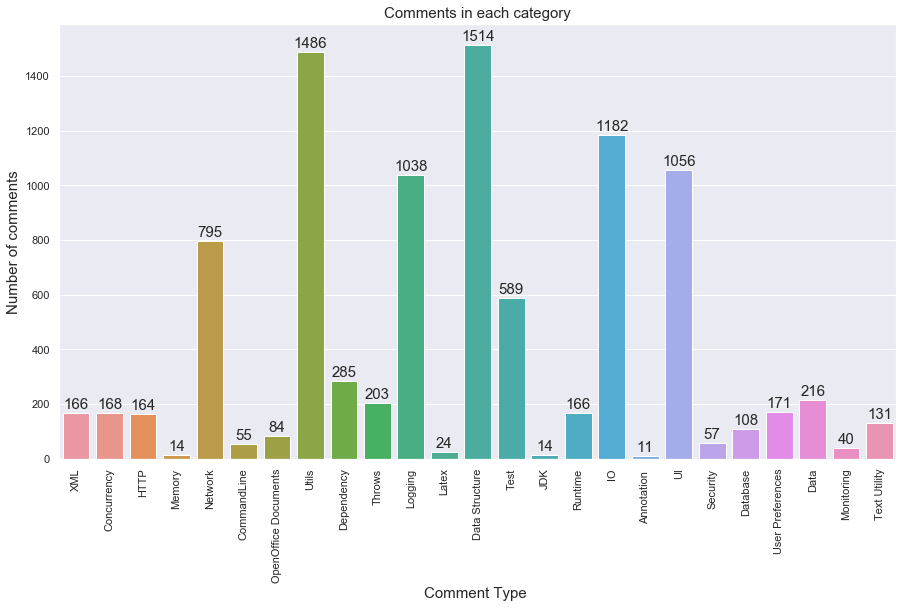

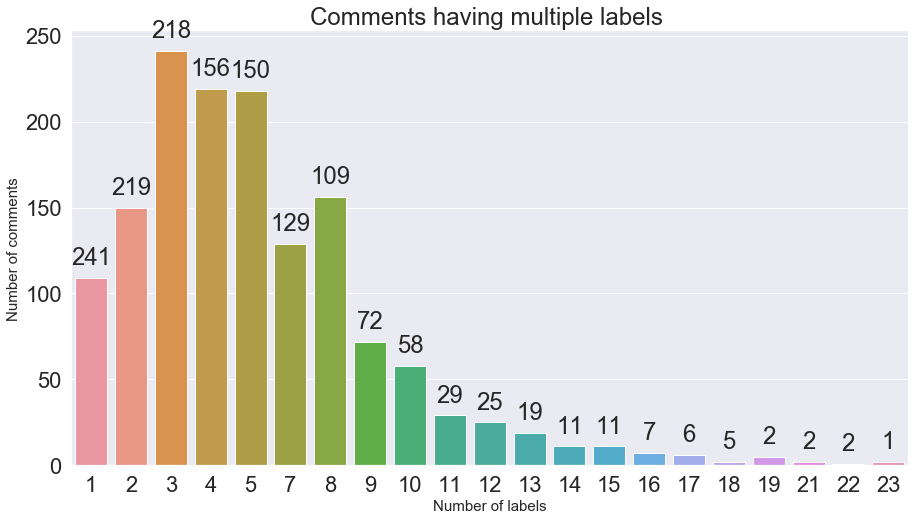

['ad', 'bigger', 'chang', 'check', 'commit', 'creat', 'describ', 'document', 'entri', 'featur', 'file', 'fix', 'git', 'help', 'issu', 'manual', 'messag', 'outdat', 'page', 'run', 'screenshot', 'status', 'test', 'ui', 'use']
               term  frequency
0   chang            4216     
1   help             2223     
2   test             2218     
3   issu             1897     
4   creat            1710     
5   run              1187     
6   ad               1078     
7   fix              941      
8   describ          929      
9   check            900      
10  featur           897      
11  manual           849      
12  ui               838      
13  screenshot       814      
14  bigger           791      
15  messag           788      
16  document         773      
17  commit           766      
18  page             764      
19  status           743      
20  git              724      
21  outdat           718      
22  entri            588      
23  file             523      
2

<function confusion_matrix at 0x1a25e55710>
----------------
(1, 1)
50
0.2
RandomForest
----------------


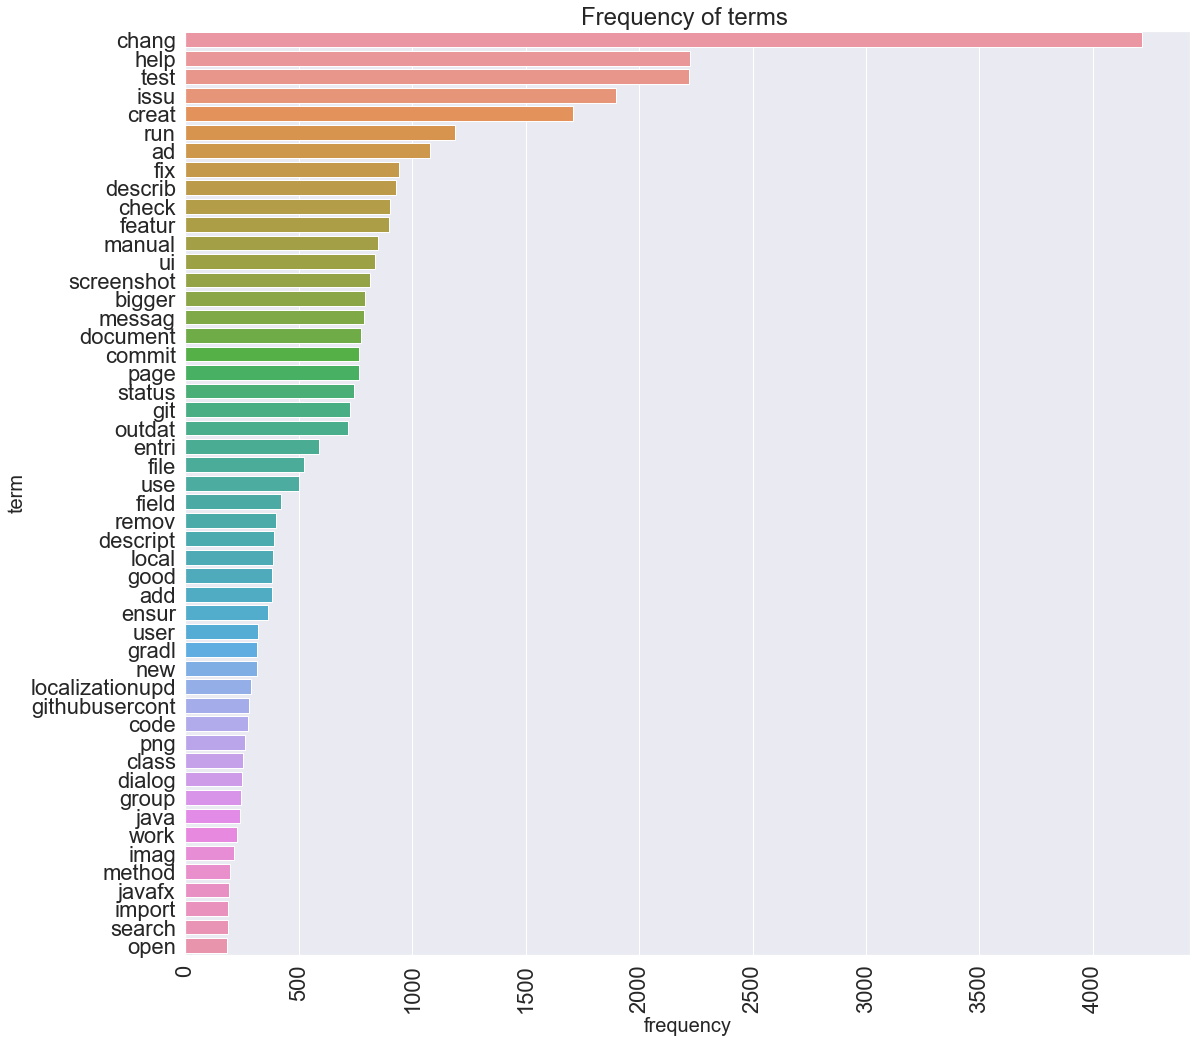

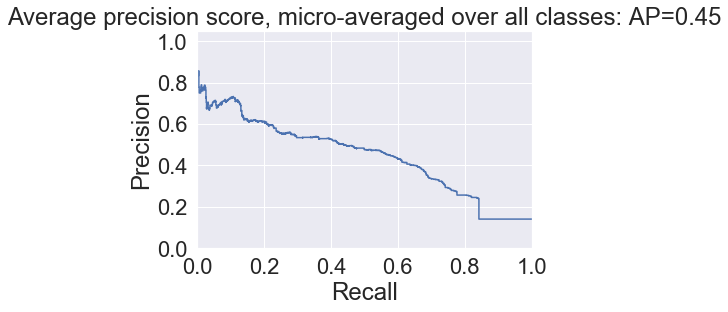

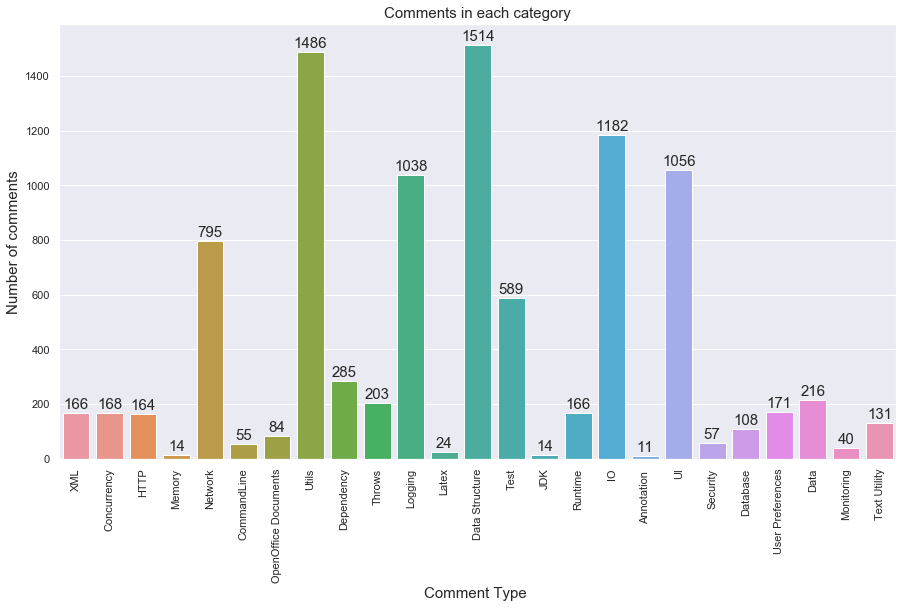

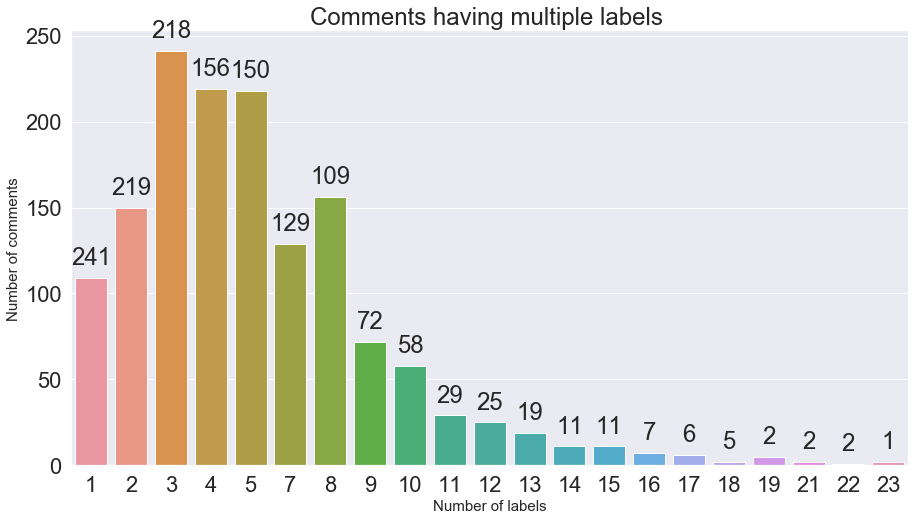

['ad', 'add', 'bigger', 'chang', 'check', 'class', 'code', 'commit', 'creat', 'describ', 'descript', 'dialog', 'document', 'ensur', 'entri', 'featur', 'field', 'file', 'fix', 'git', 'githubusercont', 'good', 'gradl', 'group', 'help', 'imag', 'import', 'issu', 'java', 'javafx', 'local', 'localizationupd', 'manual', 'messag', 'method', 'new', 'open', 'outdat', 'page', 'png', 'remov', 'run', 'screenshot', 'search', 'status', 'test', 'ui', 'use', 'user', 'work']
               term  frequency
0   chang            4216     
1   help             2223     
2   test             2218     
3   issu             1897     
4   creat            1710     
5   run              1187     
6   ad               1078     
7   fix              941      
8   describ          929      
9   check            900      
10  featur           897      
11  manual           849      
12  ui               838      
13  screenshot       814      
14  bigger           791      
15  messag           788      
16  docume

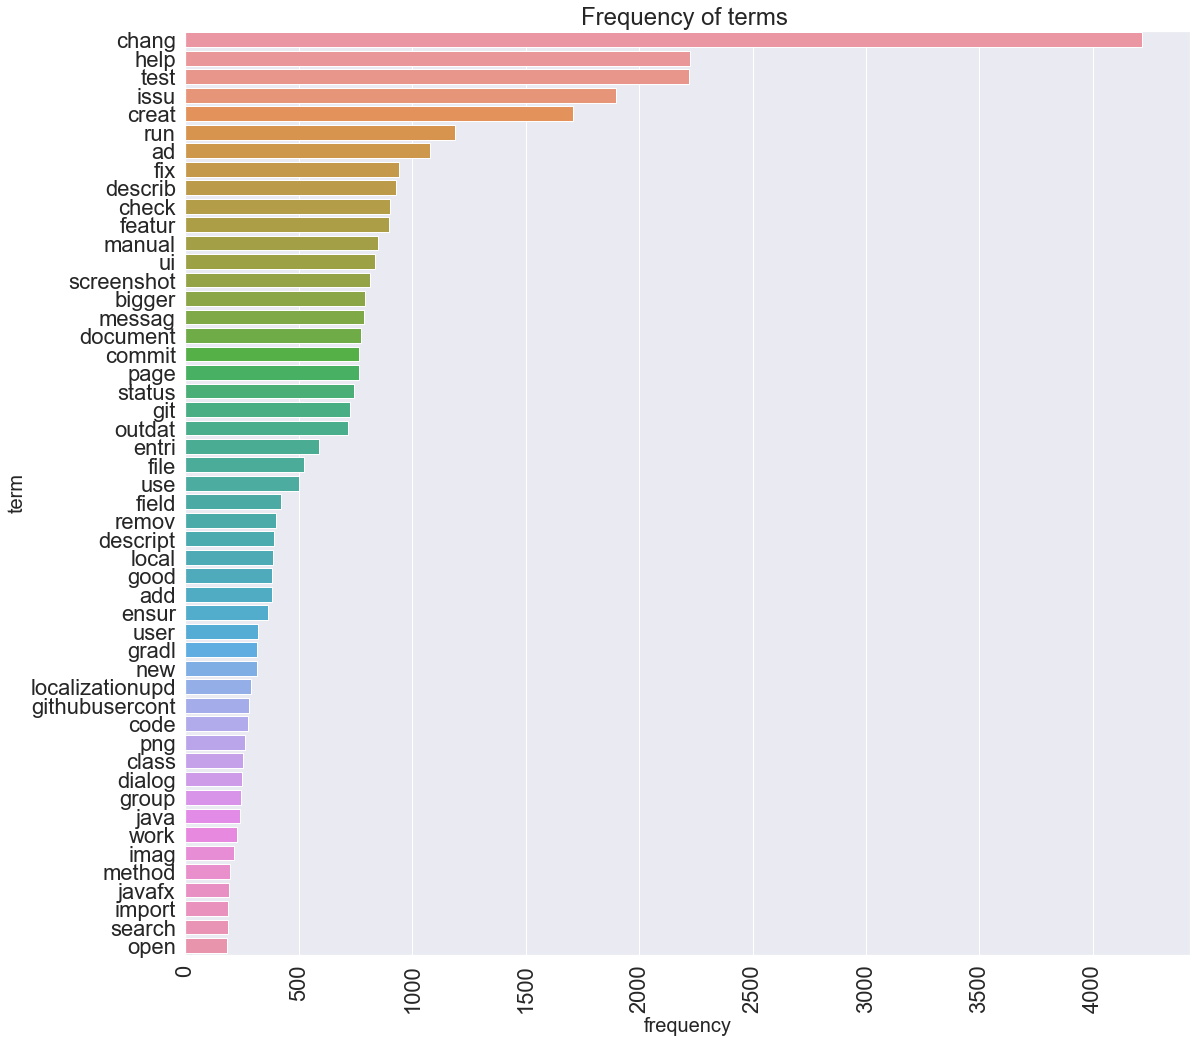

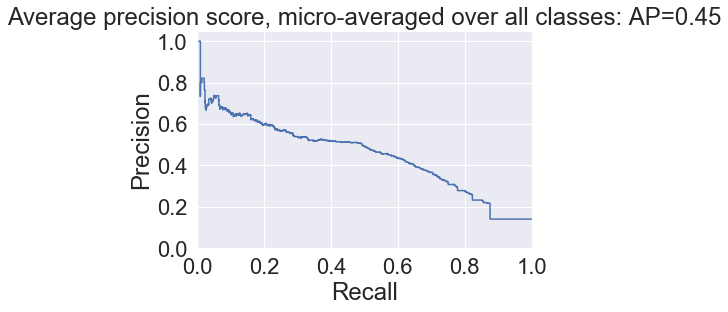

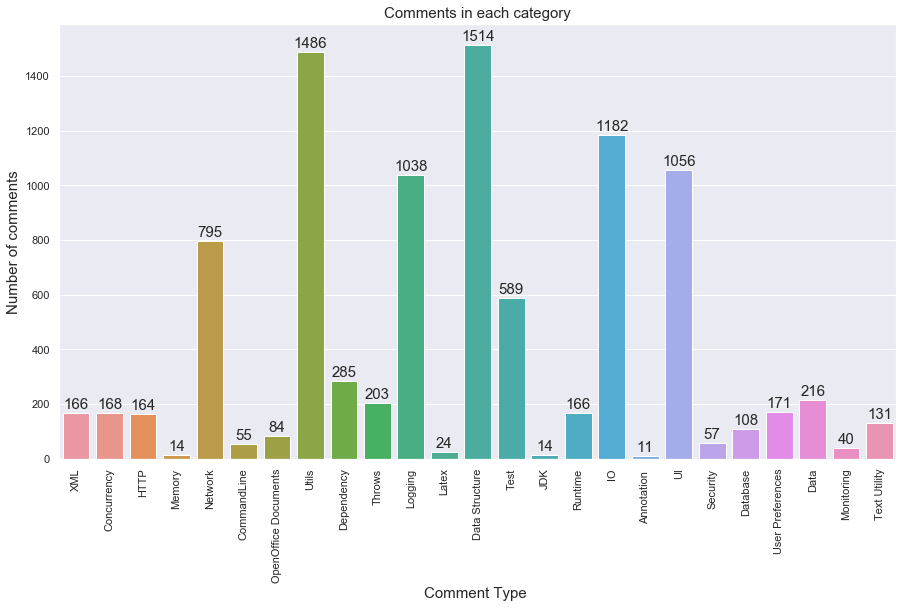

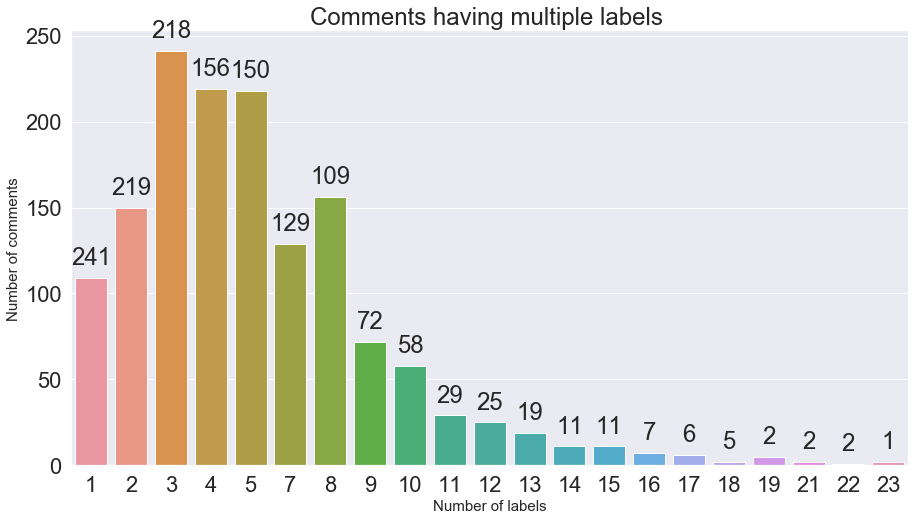

['ad bigger', 'bigger ui', 'chang describ', 'chang featur', 'chang manual', 'check document', 'commit messag', 'creat chang', 'creat outdat', 'describ test', 'document status', 'featur run', 'git commit', 'help help', 'help issu', 'help page', 'issu creat', 'manual test', 'outdat help', 'page help', 'screenshot ad', 'status issu', 'test chang', 'test creat', 'ui chang']
               term  frequency
0   chang            4216     
1   help             2223     
2   test             2218     
3   issu             1897     
4   creat            1710     
5   run              1187     
6   ad               1078     
7   fix              941      
8   describ          929      
9   check            900      
10  featur           897      
11  manual           849      
12  ui               838      
13  screenshot       814      
14  bigger           791      
15  messag           788      
16  document         773      
17  commit           766      
18  page             764      
19  sta

Pandas(Index=797, date_time='2020-04-14 10:45:01.207460', _2='(3, 3)', _3=2500.0, Stop_Word='Yes', _5=0.3, Algorithm='DecisionTree', Accuracy_Score=0.11174785100286533, Accuracy_Score_not_normalized=39.0, zero_one_loss=0.8882521489971347, _10=0.2985922485066181, hamming_loss_avg=0.15082052617869238, Jaccard_samples=0.2472533356487511, Jaccard_macro=0.18508092892329345, Precision=0.437603993344426, Recall=0.24284395198522624, Fmeasure_Score=0.3123515439429929)
Pandas(Index=798, date_time='2020-04-14 10:45:08.681043', _2='(3, 3)', _3=2500.0, Stop_Word='Yes', _5=0.3, Algorithm='LogisticRegression', Accuracy_Score=0.08882521489971347, Accuracy_Score_not_normalized=31.0, zero_one_loss=0.9111747851002864, _10=0.4628536314101642, hamming_loss_avg=0.1361031518624642, Jaccard_samples=0.09841156137717742, Jaccard_macro=0.07440212577502214, Precision=0.6461538461538462, Recall=0.07756232686980609, Fmeasure_Score=0.13849958779884586)
Pandas(Index=799, date_time='2020-04-14 10:45:21.391681', _2='(3

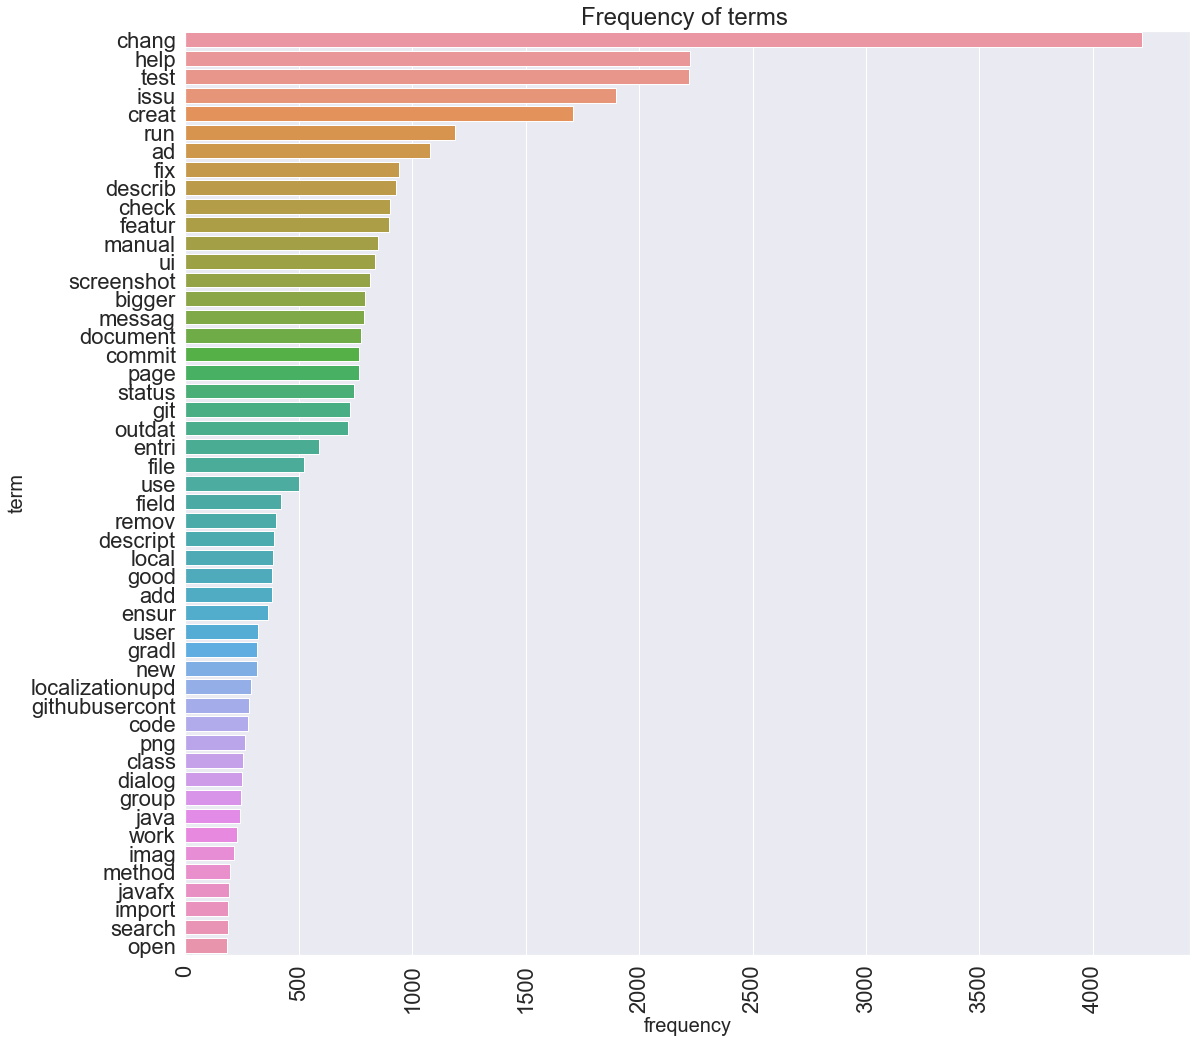

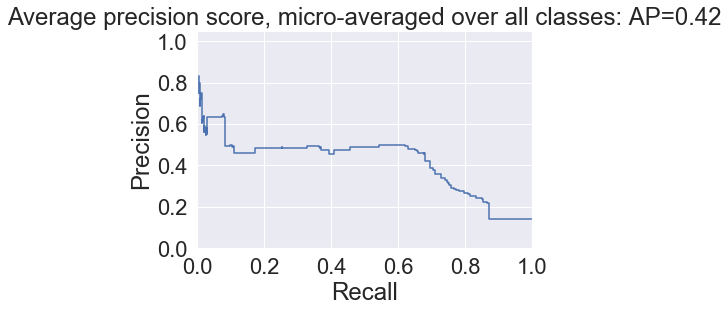

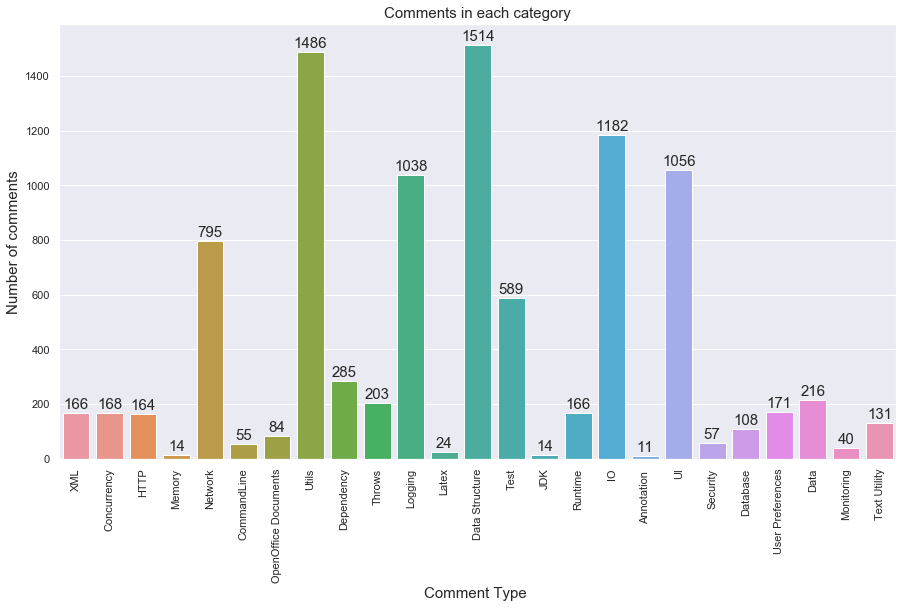

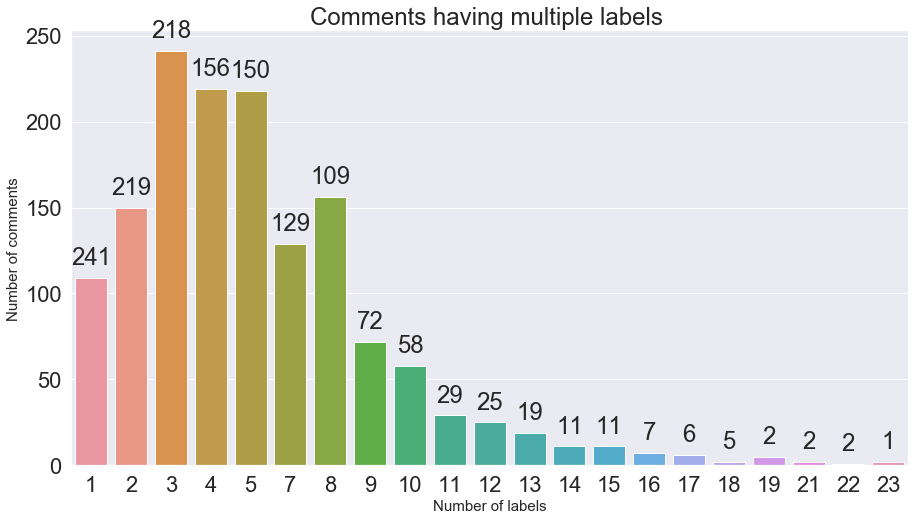

['ad bigger', 'ad descript', 'bigger ui', 'chang describ', 'chang ensur', 'chang featur', 'chang local', 'chang manual', 'chang screenshot', 'check document', 'cloud githubusercont', 'commit messag', 'creat chang', 'creat outdat', 'describ test', 'descript bigger', 'document status', 'ensur git', 'entri editor', 'featur run', 'fix chang', 'fix issu', 'git commit', 'githubusercont asset', 'good git', 'gradl localizationupd', 'help help', 'help issu', 'help page', 'imag githubusercont', 'issu chang', 'issu creat', 'local run', 'manual test', 'messag check', 'messag good', 'outdat help', 'page help', 'png chang', 'pull request', 'run check', 'run gradl', 'run jabref', 'run screenshot', 'screenshot ad', 'status issu', 'test chang', 'test creat', 'ui chang', 'user imag']
               term  frequency
0   chang            4216     
1   help             2223     
2   test             2218     
3   issu             1897     
4   creat            1710     
5   run              1187     
6   ad

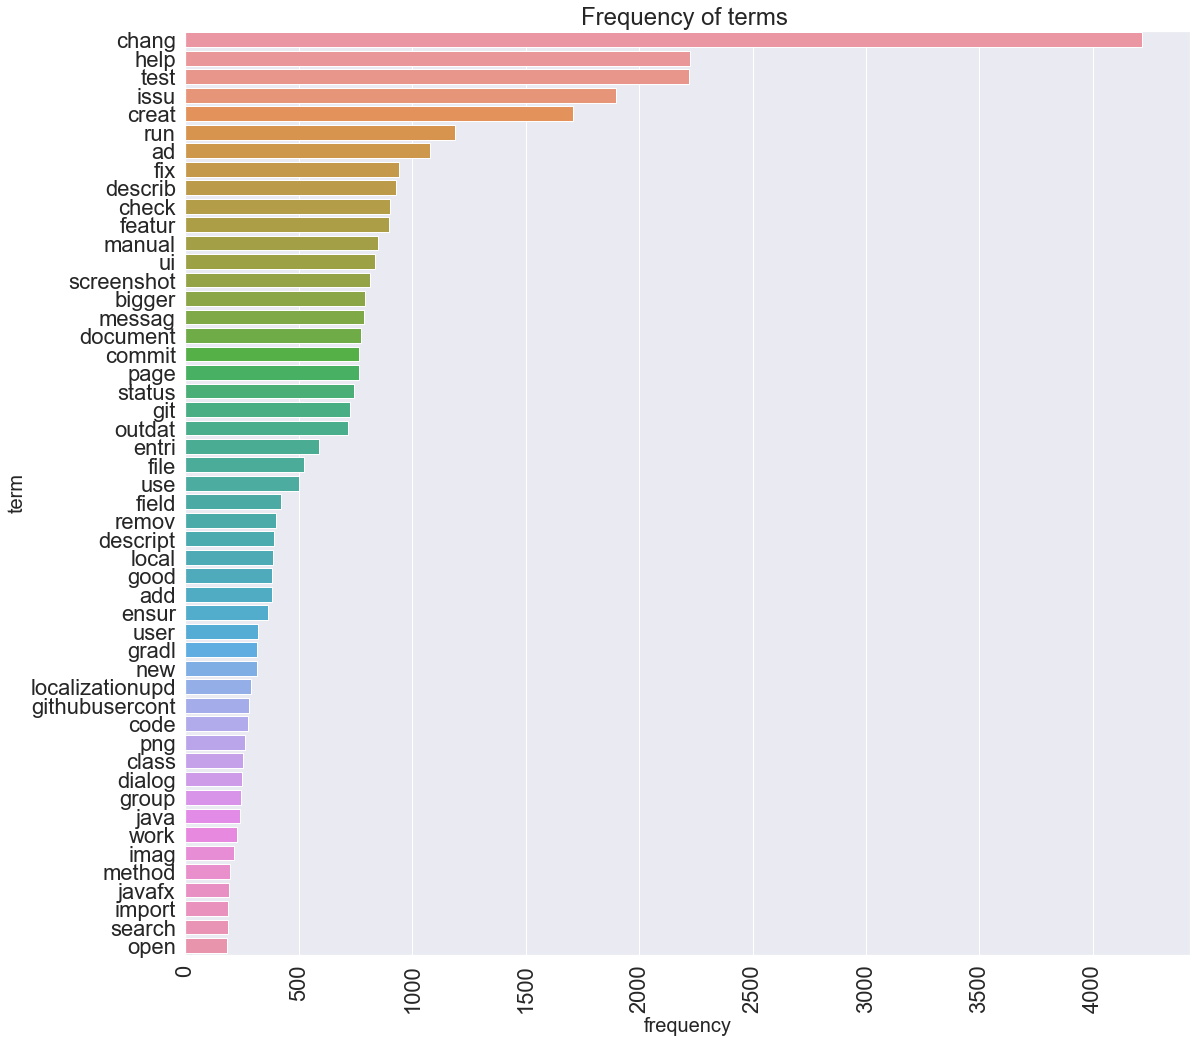

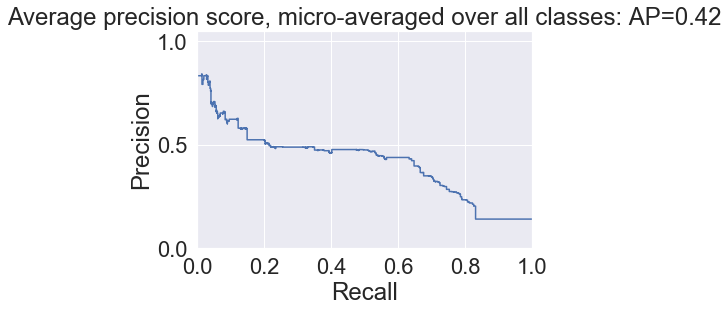

In [49]:
__main__()

In [ ]:
configurationTFIDFList = [(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(1,1),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(2,2),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4),(4,4)]


In [ ]:
len(configurationTFIDFList)


In [ ]:
num_featureList = [25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000,25,50,100,500,1000,2500,5000]


In [ ]:
len(num_featureList)

In [ ]:
size_testList = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]


In [ ]:
len(size_testList)

In [ ]:
test_typeList = ["RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest"
,"RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest","RandomForest"]


In [ ]:
len(test_typeList)

In [ ]:
size_testList = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]

In [ ]:
len(size_testList)